<a href="https://colab.research.google.com/github/mervegb/stock-market-analysis-lstm/blob/main/stock_market_analysis_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses yfinance to get stock information and visualize different aspects of it using Seaborn and Matplotlib

We'll look into few ways of analyzing the risk of a stock based on its previous performance history

We'll also be predicting future stock prices through a Long Short Term Memory (LSTM) method

In [1]:
!pip install -q yfinance

**1) What was the change in price of the stock over time?**

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for ticker in tickers:
    globals()[ticker] = yf.download(ticker, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]

for company, company_name in zip(company_list, company_names):
    company["company_name"] = company_name

df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#Get Descriptive Statistics
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,200.204240,200.760692,202.419486,198.921067,200.647193,5.750937e+07
std,21.652273,21.484022,21.689082,21.109912,21.459579,3.034709e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.289976e+07
25%,183.486069,184.250000,185.149994,182.229996,183.919998,4.220160e+07
50%,193.223404,194.029999,195.320007,192.970001,194.199997,5.075950e+07
75%,222.525177,222.770004,225.479996,221.190002,223.919998,6.351640e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [4]:
#Information about DataFrame
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-13 00:00:00+00:00 to 2024-11-13 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  253 non-null    float64
 1   (Close, AAPL)      253 non-null    float64
 2   (High, AAPL)       253 non-null    float64
 3   (Low, AAPL)        253 non-null    float64
 4   (Open, AAPL)       253 non-null    float64
 5   (Volume, AAPL)     253 non-null    int64  
 6   (company_name, )   253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


**Closing Price**

Closing price is the last price at which the stock is traded during regular trading day

Stock's closing price is the standard benchmark used by investors to track its performance over time

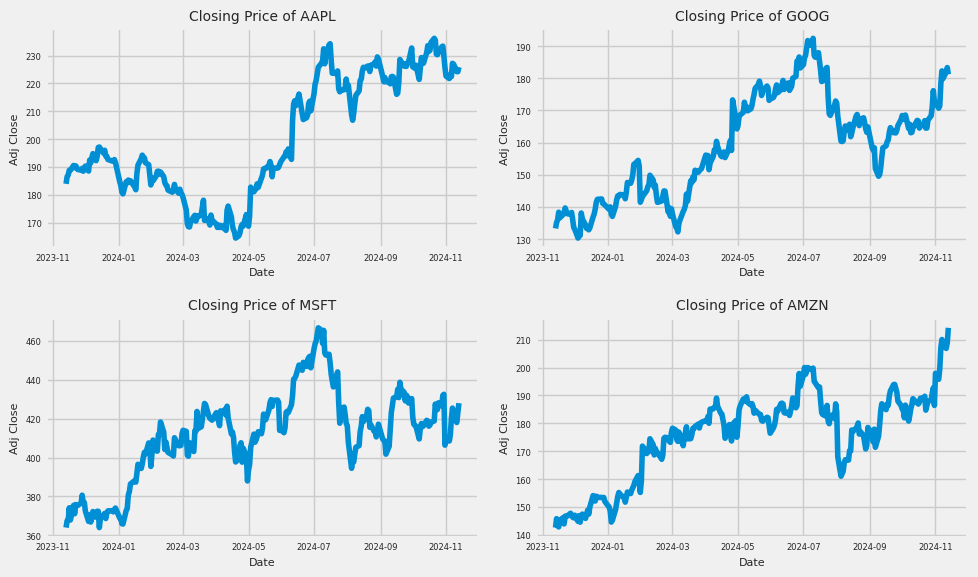

In [5]:
# Create a 2x2 subplot grid with smaller figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Loop through each company and plot
for i, (company, ticker) in enumerate(zip(company_list, tickers)):
    row, col = divmod(i, 2)  # Calculate row and column index
    axes[row, col].plot(company["Adj Close"])
    axes[row, col].set_title(f"Closing Price of {ticker}", fontsize=10)
    axes[row, col].set_ylabel("Adj Close", fontsize=8)
    axes[row, col].set_xlabel("Date", fontsize=8)

    # Reduce tick label size
    axes[row, col].tick_params(axis='both', which='major', labelsize=6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Volume of Sales**

Volume refers to the number of shares or contracts that are bought and sold during specific period.

Trading Volume tells us how active a stock or asset is in the market.

If a stock has high trading volume, it means there are buyers and sellers interested in it. This makes it easier to buy or sell the stock without waiting. Low trading volume means fewer people are interested, so it might be harder to find someone to buy from or sell to.


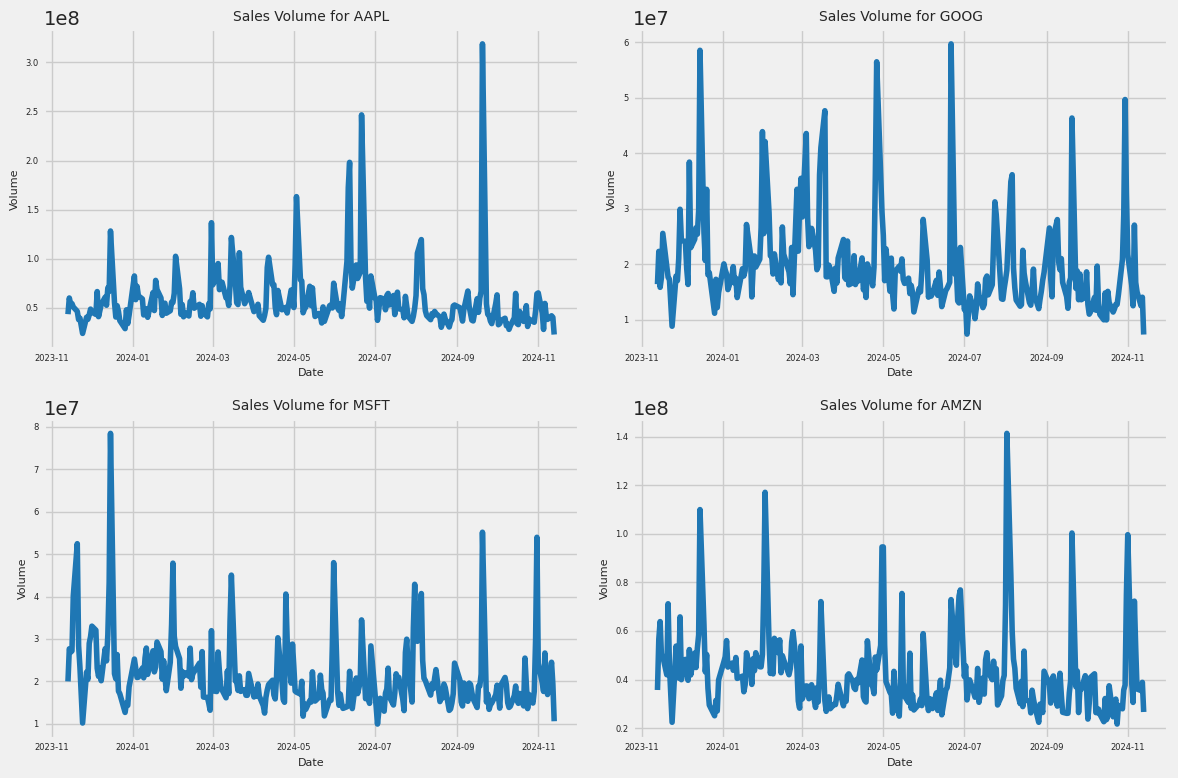

In [6]:
# Let's plot the total volume of stock being traded each day

# Create a 2x2 subplot grid with a smaller figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through each company and plot Volume for each company
for i, (company, ticker) in enumerate(zip(company_list, tickers)):
    row, col = divmod(i, 2)  # Calculate row and column index for 2x2 grid
    axes[row, col].plot(company["Volume"], color="tab:blue")
    axes[row, col].set_title(f"Sales Volume for {ticker}", fontsize=10)
    axes[row, col].set_ylabel("Volume", fontsize=8)
    axes[row, col].set_xlabel("Date", fontsize=8)

    # Reduce tick label size for both axes
    axes[row, col].tick_params(axis='both', which='major', labelsize=6)

# Use tight layout to ensure spacing between subplots
plt.tight_layout()
plt.show()

**2) What was the moving average of the various stocks?**

Moving Average -> imagine you want to know the average price of a stock over the last 10 days, each day you add the newest day's price and drop the oldest day's price to calculate the new average

By continuously calculating the average this way, you get a moving average that shows the trend in the stock price

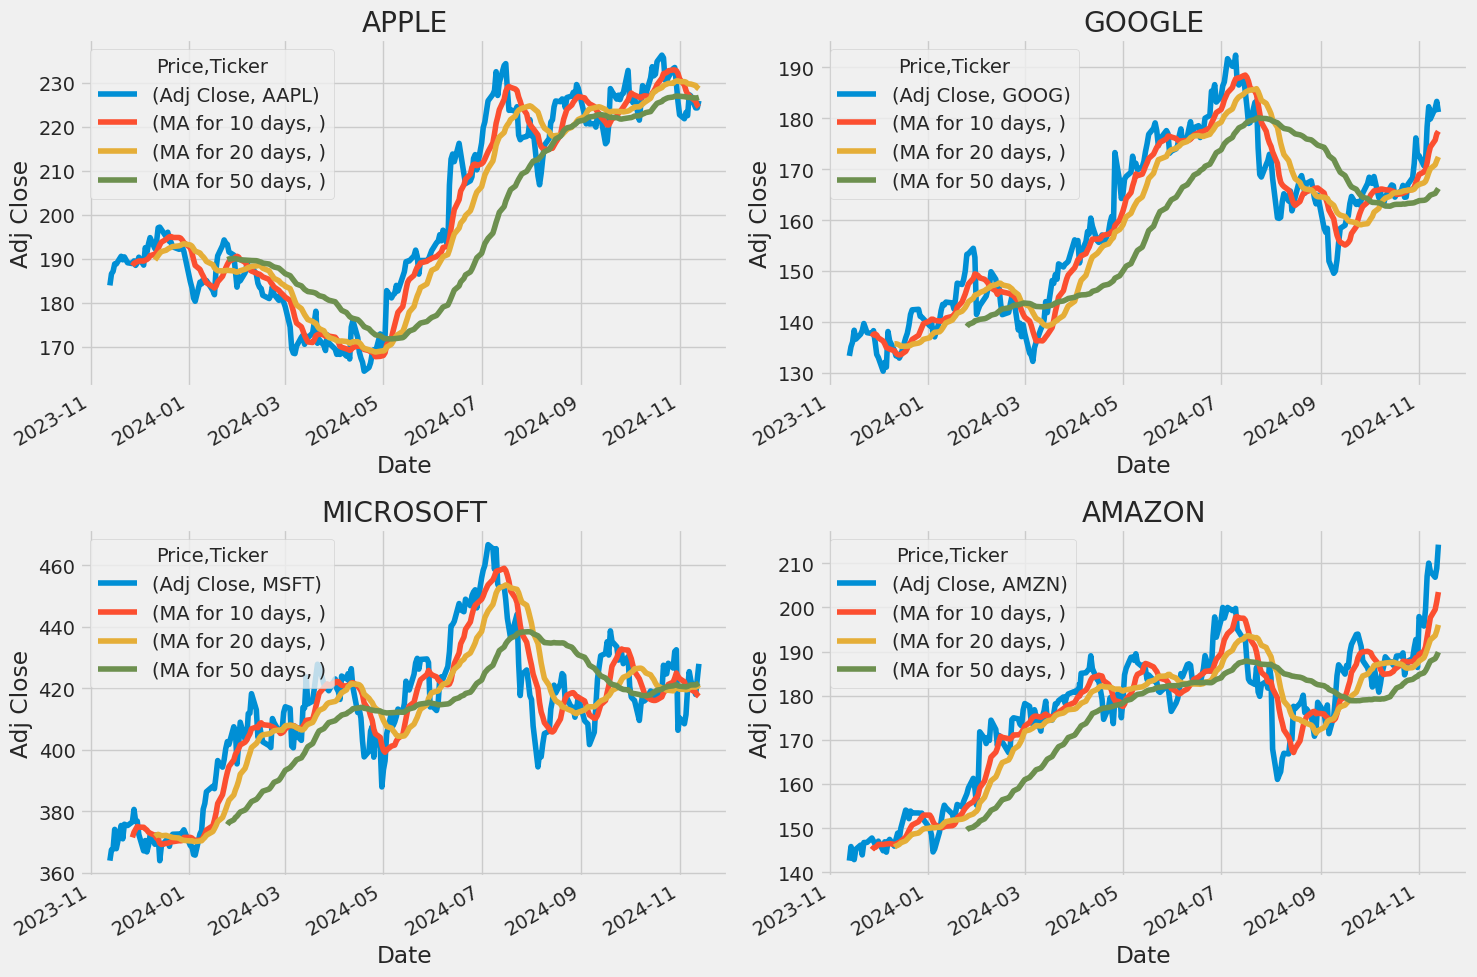

In [7]:
#Calculate and plot moving averages for four companies using different windows (10,20,50 days) on their adjusted closing prices
ma_day = [10, 20,50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company["Adj Close"].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


AAPL[["Adj Close", "MA for 10 days", "MA for 20 days","MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("APPLE")
axes[0,0].set_ylabel("Adj Close")

GOOG[["Adj Close", "MA for 10 days", "MA for 20 days","MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE")
axes[0,1].set_ylabel("Adj Close")

MSFT[["Adj Close", "MA for 10 days", "MA for 20 days","MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title("MICROSOFT")
axes[1,0].set_ylabel("Adj Close")

AMZN[["Adj Close", "MA for 10 days", "MA for 20 days","MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("AMAZON")
axes[1,1].set_ylabel("Adj Close")

fig.tight_layout()


In the graph, we can see that 10-day and 20-day moving averages are closer to the actual closing price

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise

**3) What was the daily return of the stock on average?**

Now that we've done some baseline analysis, we are now going to analyze the risk of the stock.

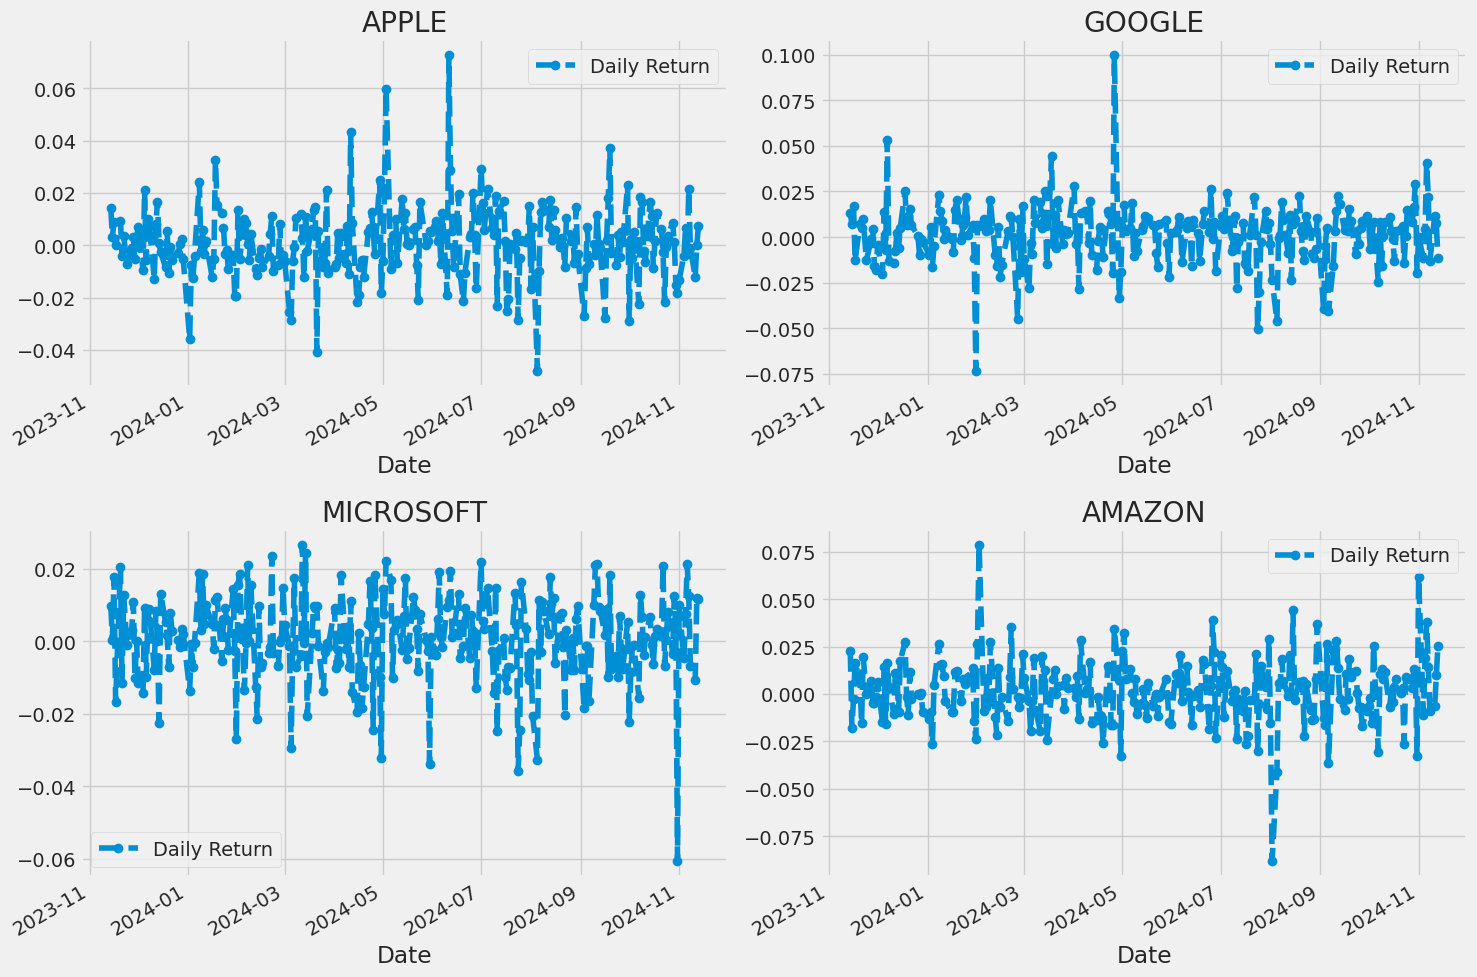

In [8]:
#We'll use pct_change to find the percent change for each day
for company in company_list:
  company["Daily Return"] = company["Adj Close"].pct_change()


#We'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

**Daily Return of a Stock**

average percentage change in the stock's price from one day to the next over a given period

Daily returns give an idea of how much the stock's price changes from day to day. Stocks with higher daily return (positive or negative) tend to be more volatile, meaning they have larger price swings

Average Daily Return can help investors understand stock's expected profitability on a day-to-day basis.

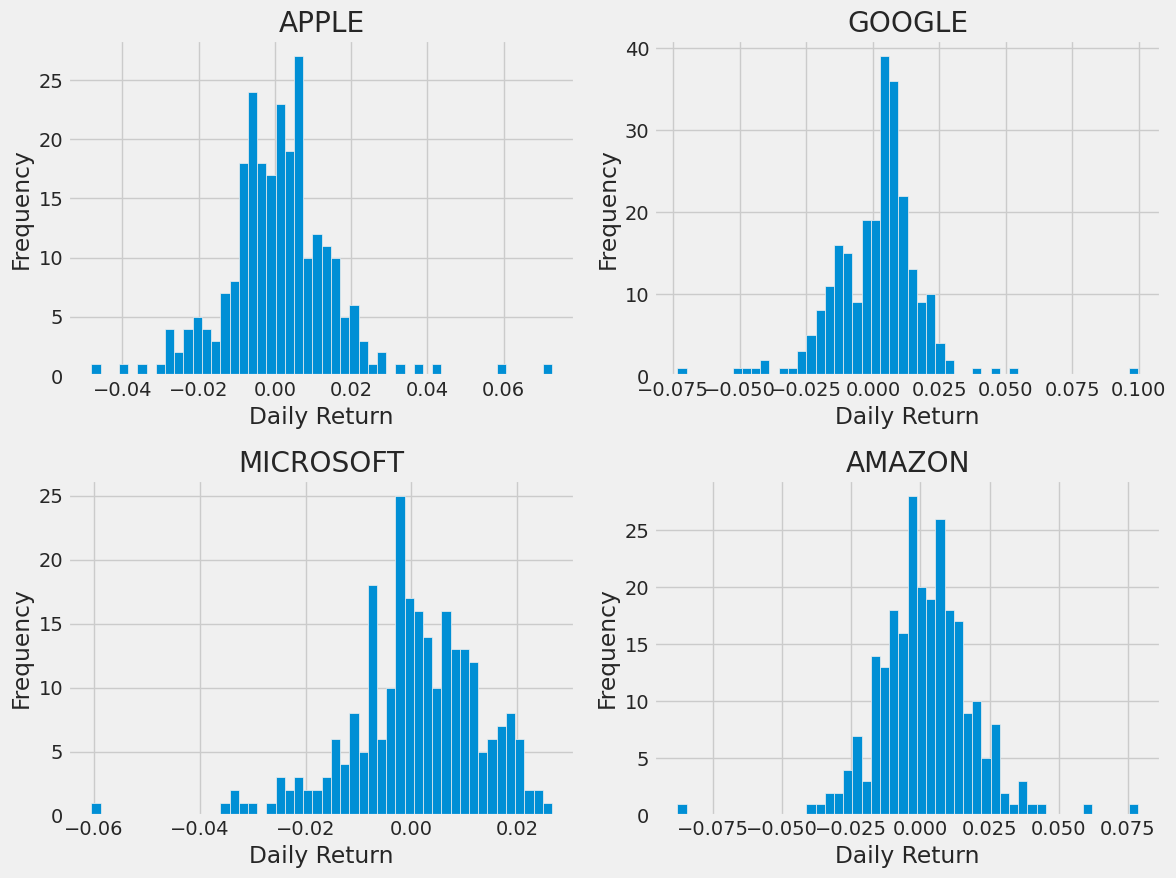

In [9]:
#Let's look at the average daily return using a histogram. We'll use seaborn to create a both histogram and kde plot on the same figure
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company["Daily Return"].hist(bins=50)
  plt.xlabel("Daily Return")
  plt.ylabel("Frequency")
  plt.title(f"{company_names[i-1]}")

plt.tight_layout()


**4) What was the correlation between different stocks closing prices?**

In [10]:
# Create a DataFrame containing only the 'Adj Close' data for each company
# Flatten the array with .squeeze() or access the Series directly
closing_prices = pd.DataFrame({
    ticker: company['Adj Close'].squeeze()
    for ticker, company in zip(tickers, company_list)
})

# Calculate daily returns as percentage change
tech_rets = closing_prices.pct_change()

# Display the first few rows of the daily returns
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-11-13 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-14 00:00:00+00:00,0.014286,0.013394,0.009790,0.022512
2023-11-15 00:00:00+00:00,0.003041,0.007015,0.000406,-0.017833
2023-11-16 00:00:00+00:00,0.009042,0.017011,0.017583,-0.002584
2023-11-17 00:00:00+00:00,-0.000105,-0.012689,-0.016801,0.016453


Now we can compare the daily percentage return of two stocks to check how correlated, first let's see a stock compared to itself

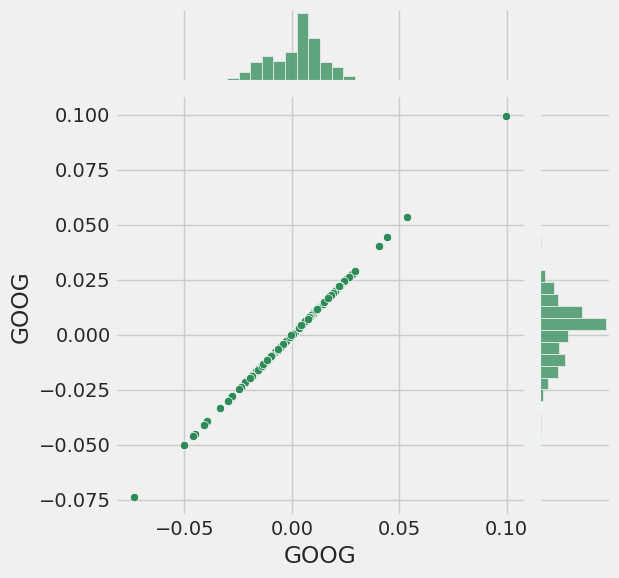

In [11]:
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

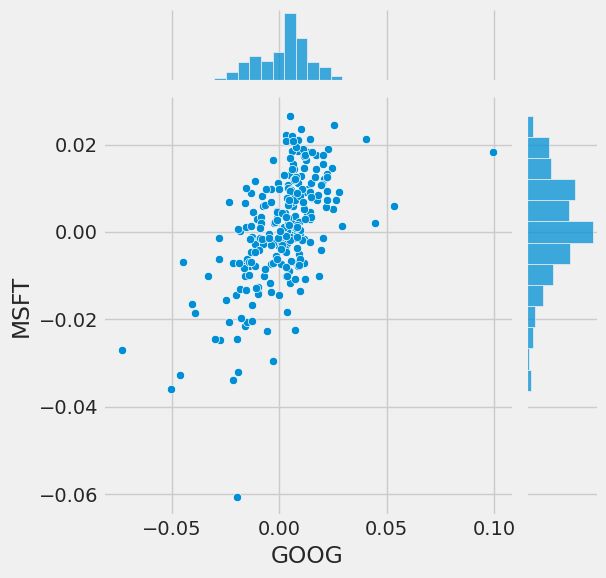

In [12]:
#We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind='scatter')

If two stocks are perfectly and positively correlated with each other, it means that when one stock's daily return goes up, the other stock's daily return also goes up.

If two stocks are perfectly correlated,holding both wouldn't reduce risk in a portfolio

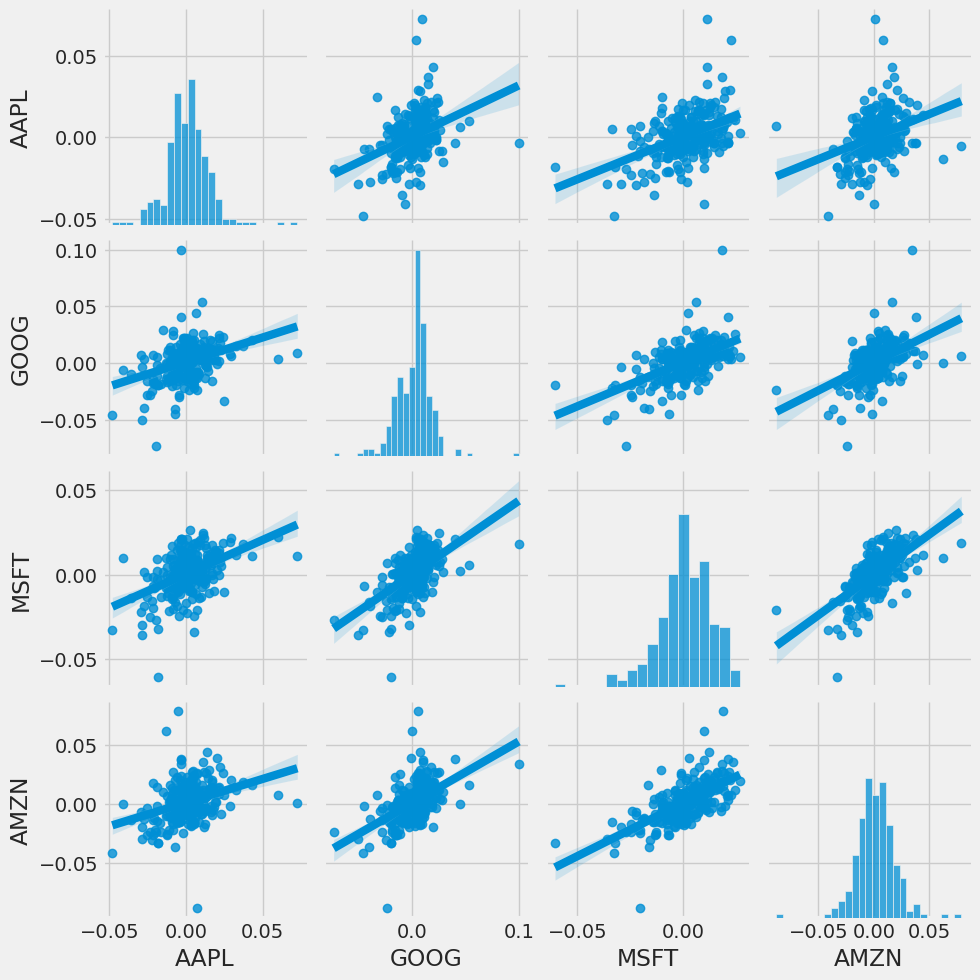

In [13]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all stocks.

Quick glance shows an interesting correlation between Google and Amazon daily returns

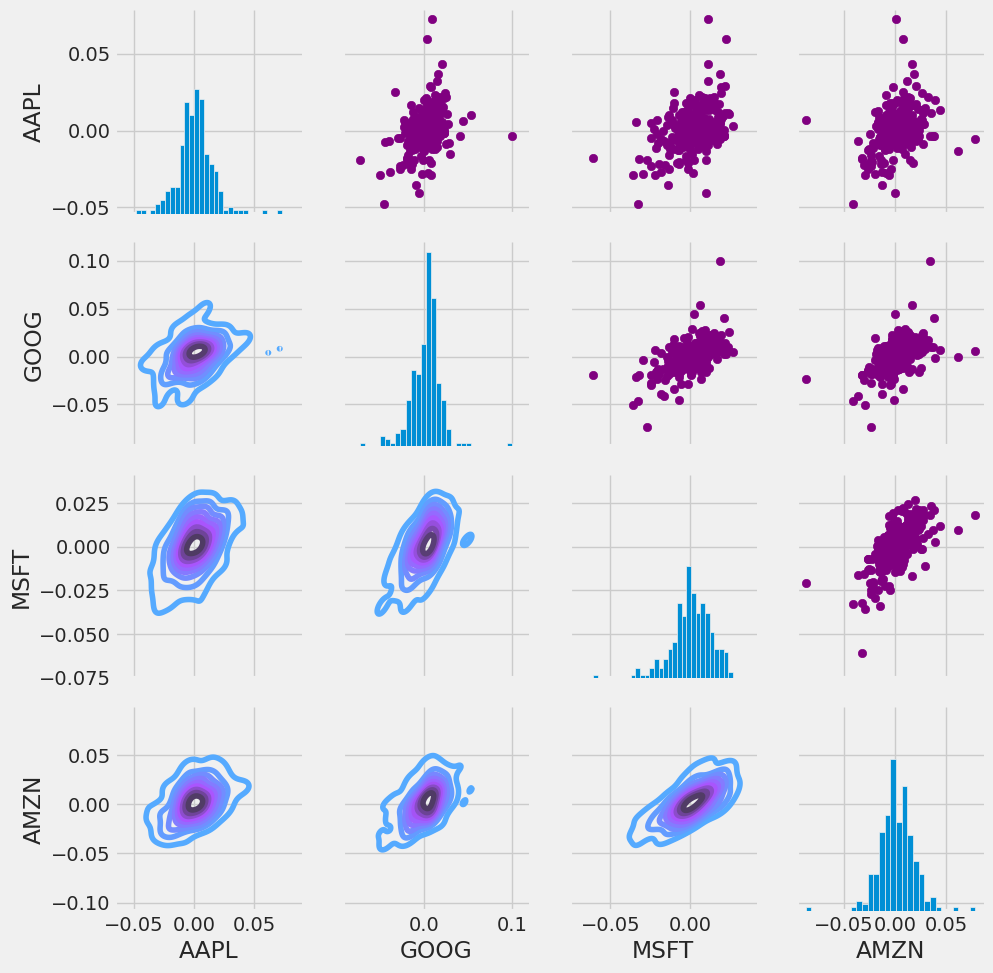

In [14]:
#PairGrid -> exploring pairwise relationships between features in a DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

#To specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color="purple")

#lower triangle
return_fig.map_lower(sns.kdeplot, cmap="cool_d")

return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of Closing Prices')

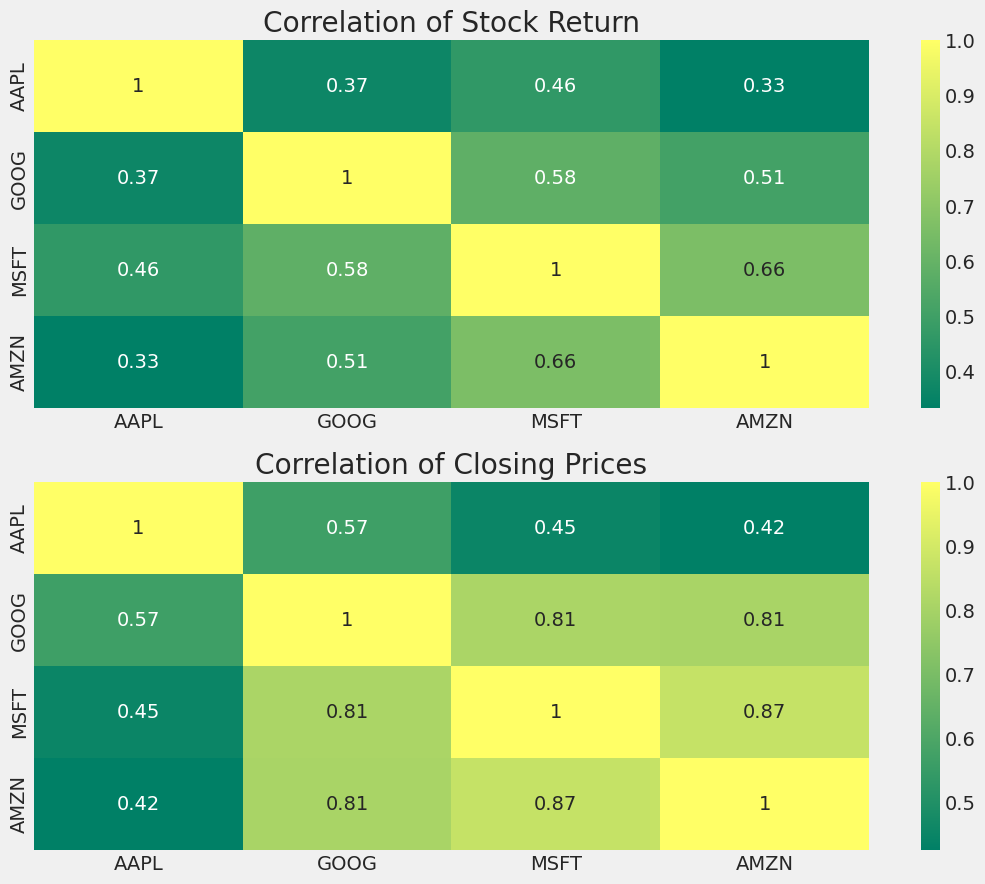

In [15]:
#Correlation Plot -> get numerical values for the correlation between stocks' daily return values
#By comparing the closing prices, we see an interesting relationship between Microsoft and Apple

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)

sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Return')

plt.subplot(2,1,2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='summer')
plt.title('Correlation of Closing Prices')

**Predicting the closing price stock price of APPLE INC.**

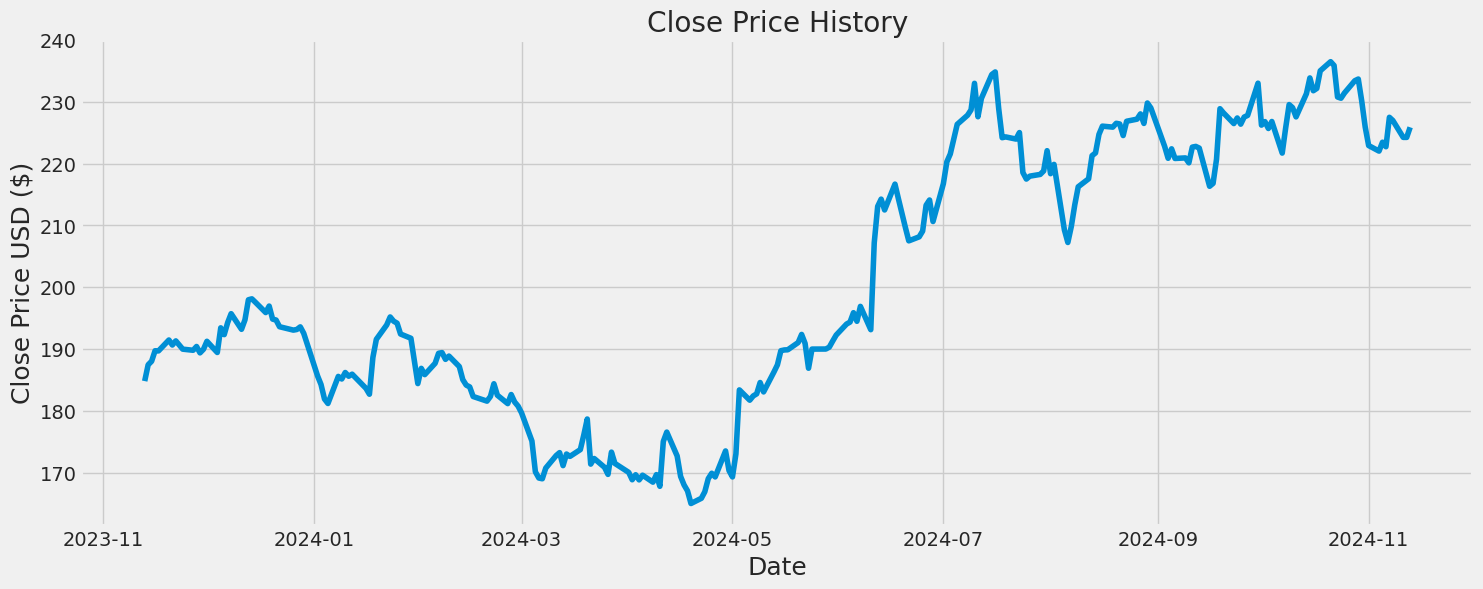

In [16]:
plt.figure(figsize=(16,6))
plt.title("Close Price History")
plt.plot(AAPL["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [23]:
import numpy as np

#Create a new DataFrame with only the Close column
data = df[["Close"]]

#Convert the DataFrame to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

962

In [25]:
#Scale the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [26]:
#Create the training dataset
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

  if i<= 60:
    print(x_train)
    print(y_train)
    print()

#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.27700062, 0.31393402, 0.32190817, 0.34569122, 0.34541136,
       0.37003356, 0.35870175, 0.36807497, 0.34932852, 0.34681022,
       0.35534409, 0.34093448, 0.34904866, 0.36709579, 0.34177384,
       0.39759373, 0.38220494, 0.40948525, 0.42963079, 0.39423607,
       0.41564086, 0.46110812, 0.46320653, 0.45565206, 0.43214887,
       0.44683834, 0.41731958, 0.41522096, 0.40011203, 0.39241753,
       0.39381639, 0.39983217, 0.3851427 , 0.28875211, 0.26930612,
       0.23656974, 0.22635693, 0.28763289, 0.28175714, 0.29644661,
       0.28805257, 0.29266927, 0.26063243, 0.24734183, 0.33058207,
       0.37157246, 0.40416901, 0.42221593, 0.41270288, 0.40808618,
       0.3836038 , 0.37395072, 0.32232785, 0.27140452, 0.30581984,
       0.29169009, 0.31729147, 0.3399553 , 0.3414942 , 0.32624523])]
[0.3336598703002851]



(902, 60, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


902/902 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - loss: nan


In [40]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


nan

<ipython-input-41-f3b0473a1d0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


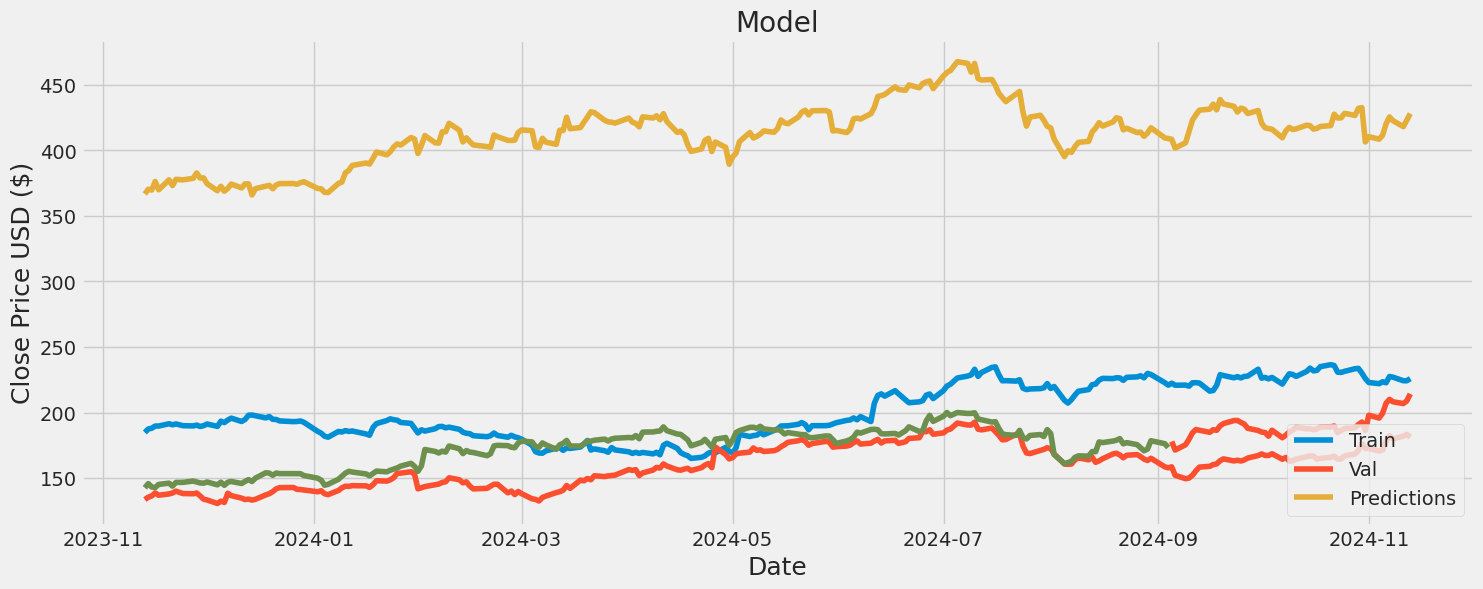

In [41]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Visualize the data
plt.figure(figsize=(16,6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()